#WINE QUALITY PREDICTION USING ML
1. Data analysis: The data can be pre processed and visualized in this step. The relations between various parameters and wine quality can be figured out. The data can be visualized using graphs and plots.

2. Work Flow: 
i.) Get data from kaggle
ii.) Data analysis
iii.) Data preprocessing
iv.)Split dataset into training and testing data
v.) Train the model using Random Forest Model
vi.) Test the data using testing dataset
vii.) Input values and get predictions about quality

3. Algorith: Random Forest Model

**STEP 1:
Import dependencies i.e. python libraries**

In [52]:
import numpy as np    #create numpy arrays
import pandas as pd   #create pd data frame for analysing and processing data
import matplotlib.pyplot as plt   #to plot graphs
import seaborn as sns      #visualize data
from sklearn.model_selection import train_test_split  #split data in training and testing data
from sklearn.ensemble import RandomForestClassifier   #ensemble are the models that use more than one models to perform
from sklearn.metrics import accuracy_score  #for evaluating model

**STEP 2: Get data from kaggle and import**

In [53]:
#loading dataset to pandas dataframe

wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [54]:
#check no of rows and columns to check whether dataset is loaded properly

wine_dataset.shape

(1599, 12)

In [55]:
#get first 5 rows
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**STEP 3: To check for missing and null values: If we come across null values then we can either drop that column from dataset or take mean of the values from hat column and enter at the null places**

In [56]:
#check for missing/null values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**STEP 4: Data analysis and visualization**

In [57]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**STEP 5: Get number of values for 'quality' parameter**

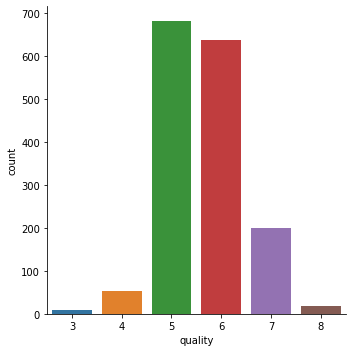

In [58]:
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

**STEP 6: interpolate the parameters with 'quality' column**

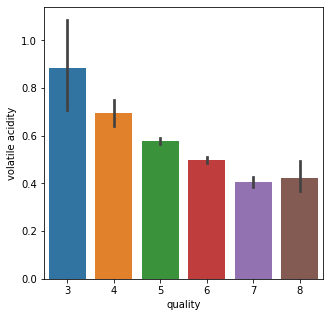

In [59]:
#volatile acidity vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)


#from the plot we infer that volatile acidity and wine quality are inversely proportional

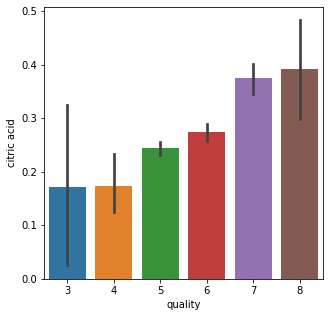

In [60]:
#citric acid vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)


#from the plot we infer that citric acid and wine quality are directly proportional

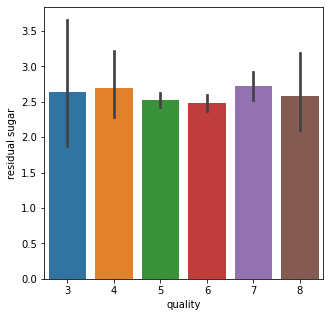

In [61]:
#residual sugar vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wine_dataset)


#from the plot we infer that residual sugar is constant with the increasing quality of wine

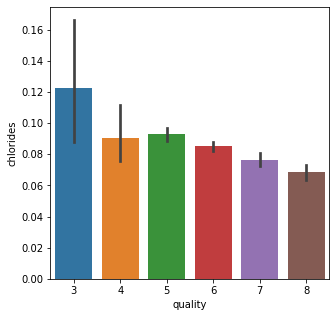

In [62]:
#chlorides vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'chlorides', data = wine_dataset)


#from the plot we infer that chlorides and wine quality are inversely proportional

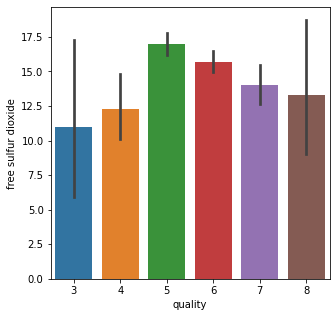

In [63]:
#free sulfur dioxide vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine_dataset)


#from the plot we infer that free sulfur dioxide varies and does not have a fixed pattern

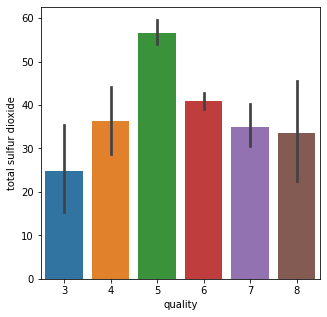

In [64]:
#total sulfur dioxide vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine_dataset)


#from the plot we infer that total sulfur dioxide varies and does not have a fixed pattern

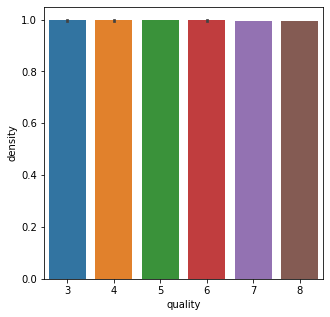

In [65]:
#density vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'density', data = wine_dataset)


#from the plot we infer that density is constant

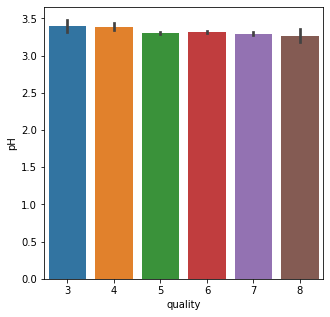

In [66]:
#pH vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'pH', data = wine_dataset)


#from the plot we infer that pH remains constant and shows some decrement as quality increases

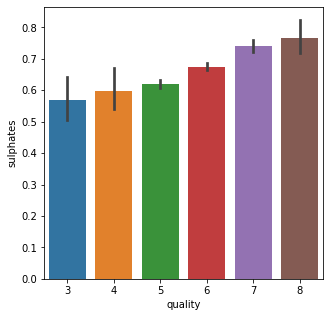

In [67]:
#sulphates vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'sulphates', data = wine_dataset)


#from the plot we infer that sulphates and wine quality are directly proportional

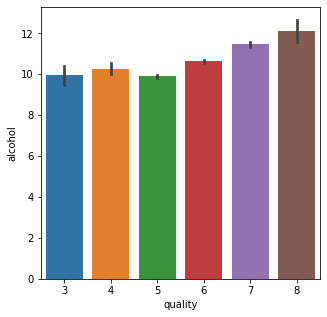

In [68]:
#alcohol vs Quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_dataset)


#from the plot we infer that alcohol and wine quality are directly proportional

**STEP 7: Get the correlation of various parameters and wine quality**

In [69]:
correlation = wine_dataset.corr()   #a variable to store the correlation

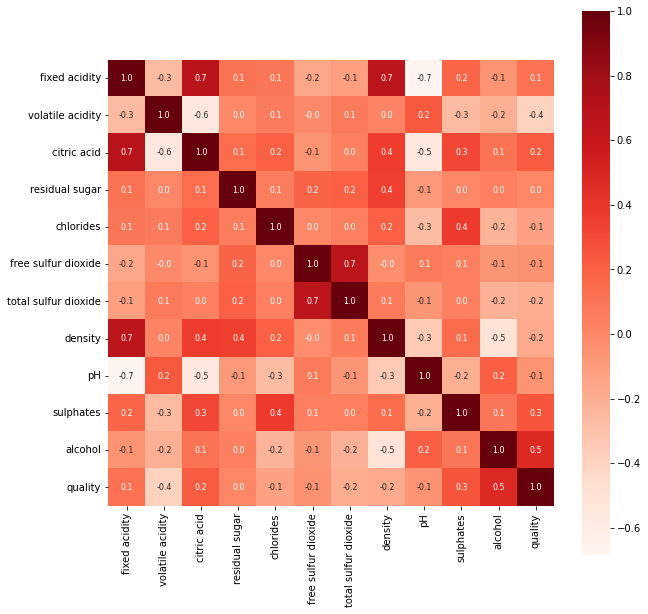

In [70]:
#Depict the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={ 'size': 8}, cmap = 'Reds')

#here we need to ignore the diagonal values are both x and y axes are same for them
#in the quality column, the highest value is 0.5 which is of alcohol that tells us that the alcohol 
#content is directly proportional to the quality of wine. While the least value is of vlatile acidity, 
#which tells us that the volatile acidity and quality are inversely proportional 

**STEP 8: Data preprocessing -
Drop the quality column and separate the i/p data**

In [71]:
X = wine_dataset.drop('quality', axis = 1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**STEP 9: Data Binarization-The available data has quality values ranging from 3 to 8. This valus are needed to be reduced to 2 values '0'(bad) and '1'(good) for better understanding of results**

**Thus here if quality >= 7 : then output = 1**
**else: output = 0**

In [83]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


**STEP 10: Split the data into training and testing**

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


**STEP 11: Train the model**

**Model: Random Forest Classifier**

**The Random Forest Classifier contains no. of decision trees that increases the accuracy of prediction**

In [74]:
model = RandomForestClassifier()

In [81]:
model.fit(X_train.values, Y_train.values)

RandomForestClassifier()

**STEP 12: Model Evaluation**

**Accuracy Testing**

In [78]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9125


**STEP 13: Build a predictive system that predicts the quality**

In [85]:
input_data = (4.6,0.52,0.15,2.1,0.054000000000000006,8.0,65.0,0.9934,3.9,0.56,13.1)
#changing the format of i/p to array

data_as_array = np.asarray(input_data)

#reshape the numpy array
data_reshaped = data_as_array.reshape(1,-1)

prediction = model.predict(data_reshaped)
print(prediction)


[0]
